In [1]:
import boto3, os

s3 = boto3.resource('s3')

cfn = boto3.client('cloudformation')

In [2]:
data_lake_bucket = cfn.describe_stacks(StackName='GenomicsDataLakePipe')['Stacks'][0]['Outputs'][0]['OutputValue']
print data_lake_bucket

genomicsdatalakepipe-datalakebucket-1hsd1ka3j9hpm


In [3]:
landing_zone_bucket = cfn.describe_stacks(StackName='GenomicsDataLakePipe')['Stacks'][0]['Outputs'][4]['OutputValue']
print landing_zone_bucket

genomicsdatalakepipe-landingzonebucket-atl5s7ytbqjn


In [4]:
session = boto3.session.Session()
region = session.region_name
print region

us-east-1


In [5]:
import sys
!{sys.executable} -m pip install PyAthena

    100% |████████████████████████████████| 51kB 15.2MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 23.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from pyathena import connect
import pandas as pd

In [153]:
conn = connect(s3_staging_dir='s3://%s/results/clinvar/' % data_lake_bucket,
               region_name=region)

df = pd.read_sql("select * from lifescience.clinvar limit 10;", conn)
df.head()

,alleleid,type,name,geneid,genesymbol,hgnc_id,clinicalsignificance,clinsigsimple,lastevaluated,rsid,...,referenceallele,alternateallele,cytogenetic,reviewstatus,numbersubmitters,guidelines,testedingtr,otherids,submittercategories,variationid
0,101176,single nucleotide variant,NM_005334.2(HCFC1):c.2841A>G (p.Pro947=),3054,HCFC1,HGNC:4839,Benign,0,"Dec 02, 2015",730106,...,T,C,Xq28,"criteria provided, multiple submitters, no conflicts",3,,N,-,2,95277
1,101176,single nucleotide variant,NM_005334.2(HCFC1):c.2841A>G (p.Pro947=),3054,HCFC1,HGNC:4839,Benign,0,"Dec 02, 2015",730106,...,T,C,Xq28,"criteria provided, multiple submitters, no conflicts",3,,N,-,2,95277
2,101177,single nucleotide variant,NM_005334.2(HCFC1):c.3490T>C (p.Ser1164Pro),3054,HCFC1,HGNC:4839,Benign,0,"Mar 31, 2016",1051152,...,A,G,Xq28,"criteria provided, multiple submitters, no conflicts",3,,N,UniProtKB (protein):P51610#VAR_019813,2,95278
3,101177,single nucleotide variant,NM_005334.2(HCFC1):c.3490T>C (p.Ser1164Pro),3054,HCFC1,HGNC:4839,Benign,0,"Mar 31, 2016",1051152,...,A,G,Xq28,"criteria provided, multiple submitters, no conflicts",3,,N,UniProtKB (protein):P51610#VAR_019813,2,95278
4,101178,single nucleotide variant,NM_005334.2(HCFC1):c.3550G>A (p.Gly1184Arg),3054,HCFC1,HGNC:4839,Uncertain significance,0,"Aug 23, 2018",398124207,...,C,T,Xq28,"criteria provided, single submitter",1,,N,-,2,95279


In [154]:
conn = connect(s3_staging_dir='s3://%s/results/variants/' % data_lake_bucket,
               region_name=region)

df = pd.read_sql("select * from lifescience.thousandgenomes limit 10;", conn)
df.head()

,sampleid,id,ref,alt,qual,chrom,pos,alleles,format,info,partition_0
0,hg38,rs192289480,G,[C],100,chr4,79960216,"[G, C]",None,"{eur_af=[0.0], sas_af=[0.0], ac=[1], asp=true, ssid=[ss1310446303], af=[0], afr_af=[8.0E-4], amr_af=[0.0], an=[5008], unmatched_fwd=null, eas_af=[0.0], ns=[2504], dp=[15148]}",hg38
1,hg38,rs568515688,A,[C],100,chr4,79960245,"[A, C]",None,"{eur_af=[0.0], sas_af=[0.0], ac=[7], asp=true, ssid=[ss1310446304], af=[0], afr_af=[0.0053], amr_af=[0.0], an=[5008], unmatched_fwd=null, eas_af=[0.0], ns=[2504], dp=[15418]}",hg38
2,hg38,rs184448412,T,[C],100,chr4,79960251,"[T, C]",None,"{eur_af=[0.004], sas_af=[0.0], ac=[4], asp=true, ssid=[ss1310446305], af=[0], afr_af=[0.0], amr_af=[0.0], an=[5008], unmatched_fwd=null, eas_af=[0.0], ns=[2504], dp=[15201]}",hg38
3,hg38,rs547531697,C,[A],100,chr4,79960277,"[C, A]",None,"{eur_af=[0.0], sas_af=[0.002], ac=[2], asp=true, ssid=[ss1310446306], af=[0], afr_af=[0.0], amr_af=[0.0], an=[5008], unmatched_fwd=null, eas_af=[0.0], ns=[2504], dp=[14781]}",hg38
4,hg38,rs570936396,G,[C],100,chr4,79960360,"[G, C]",None,"{eur_af=[0.001], sas_af=[0.0], ac=[1], asp=true, ssid=[ss1310446307], af=[0], afr_af=[0.0], amr_af=[0.0], an=[5008], unmatched_fwd=null, eas_af=[0.0], ns=[2504], dp=[14355]}",hg38


In [127]:
conn = connect(s3_staging_dir='s3://%s/results/variants/thousandgenomes' % data_lake_bucket,
               region_name=region)


df = pd.read_sql(
        " select distinct clinicalsignificance,referenceallele,alternateallele,pos from ("
"(SELECT chrom, pos, ref, alt FROM lifescience.thousandgenomes where ref in ('T','C','G','A') and alt[1] in ('T','C','G','A') order by RAND() limit 10000) a "
"right outer join "
"(select chromosome, type, referenceallele, alternateallele, clinicalsignificance from lifescience.clinvar where clinicalsignificance in ('Benign','Pathogenic') and referenceallele in ('T','C','G','A') and alternateallele in ('T','C','G','A') )b "
"ON "
"b.referenceallele = a.ref "
"AND  b.alternateallele = a.alt[1] "
"AND  concat('chr',b.chromosome)= a.chrom) where clinicalsignificance is not null ",conn )
                 
df.fillna(df.mean(),inplace=True)

df.head(10)


,clinicalsignificance,referenceallele,alternateallele,pos
0,Benign,C,G,114875986.0
1,Pathogenic,C,G,33151572.0
2,Benign,T,A,108866943.0
3,Pathogenic,G,C,11602054.0
4,Pathogenic,A,C,95074372.0
5,Benign,C,G,20010688.0
6,Benign,T,G,35406783.0
7,Pathogenic,T,A,232527981.0
8,Pathogenic,T,G,80773978.0
9,Pathogenic,C,T,55843944.0


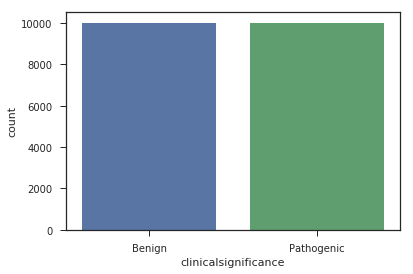

In [128]:
import seaborn as sns

sns.countplot(x="clinicalsignificance", data=df)



/home/ec2-user/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


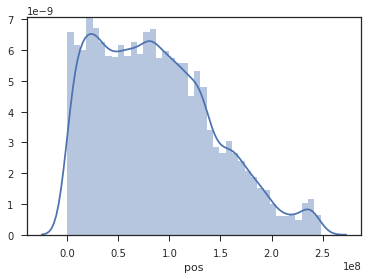

In [129]:
sns.distplot(df.pos)

In [130]:
cleanup_clinicalsig = {'clinicalsignificance':{'Benign':0, 'Pathogenic':1}}
df1=df.replace(cleanup_clinicalsig)

df1.head()


,clinicalsignificance,referenceallele,alternateallele,pos
0,0,C,G,114875986.0
1,1,C,G,33151572.0
2,0,T,A,108866943.0
3,1,G,C,11602054.0
4,1,A,C,95074372.0


In [131]:
df2=pd.get_dummies(df1)
df2.head(10)

,clinicalsignificance,pos,referenceallele_A,referenceallele_C,referenceallele_G,referenceallele_T,alternateallele_A,alternateallele_C,alternateallele_G,alternateallele_T
0,0,114875986.0,0,1,0,0,0,0,1,0
1,1,33151572.0,0,1,0,0,0,0,1,0
2,0,108866943.0,0,0,0,1,1,0,0,0
3,1,11602054.0,0,0,1,0,0,1,0,0
4,1,95074372.0,1,0,0,0,0,1,0,0
5,0,20010688.0,0,1,0,0,0,0,1,0
6,0,35406783.0,0,0,0,1,0,0,1,0
7,1,232527981.0,0,0,0,1,1,0,0,0
8,1,80773978.0,0,0,0,1,0,0,1,0
9,1,55843944.0,0,1,0,0,0,0,0,1


In [132]:
import numpy as np
train_data, validation_data, test_data = np.split(df2.sample(frac=1, random_state=1729), [int(0.7 * len(df2)), int(0.9 * len(df2))])
test_label = test_data.iloc[:,0]
test_data.drop(['clinicalsignificance'], axis = 1, inplace=True)

train_data.to_csv('train_xgb.csv', header=False, index=False)
validation_data.to_csv('validation_xgb.csv', header=False, index=False)
test_data.to_csv('test_xgb.csv', header=False, index=False)

print (train_data.shape, validation_data.shape, test_data.shape, test_label.shape)



((14021, 10), (4006, 10), (2004, 9), (2004,))


In [133]:
prefix = 'ml'
boto3.Session().resource('s3').Bucket(data_lake_bucket).Object(os.path.join(prefix, 'train/train_xgb.csv')).upload_file('train_xgb.csv')
boto3.Session().resource('s3').Bucket(data_lake_bucket).Object(os.path.join(prefix, 'validation/validation_xgb.csv')).upload_file('validation_xgb.csv')
boto3.Session().resource('s3').Bucket(data_lake_bucket).Object(os.path.join(prefix, 'test/test_xgb.csv')).upload_file('test_xgb.csv')




In [134]:
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'xgboost')
train_data['clinicalsignificance'].value_counts()

0    7032
1    6989
Name: clinicalsignificance, dtype: int64

In [135]:
import sagemaker
s3_input_train = sagemaker.s3_input(s3_data='s3://{}/{}/train'.format(data_lake_bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data='s3://{}/{}/validation/'.format(data_lake_bucket, prefix), content_type='csv')
s3_input_test = sagemaker.s3_input(s3_data='s3://{}/{}/test/'.format(data_lake_bucket, prefix), content_type='csv')


In [136]:
from sagemaker import get_execution_role

role = get_execution_role()
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(container,
                                    role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(data_lake_bucket, prefix),
                                    sagemaker_session=sess)
xgb.set_hyperparameters(silent=0,
                        objective='binary:logistic',
                        num_round=20,
                        eval_metric='auc')

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})


INFO:sagemaker:Creating training-job with name: xgboost-2019-02-21-00-54-10-817


2019-02-21 00:54:10 Starting - Starting the training job...
2019-02-21 00:54:12 Starting - Launching requested ML instances......
2019-02-21 00:55:18 Starting - Preparing the instances for training......
2019-02-21 00:56:25 Downloading - Downloading input data
2019-02-21 00:56:25 Training - Downloading the training image..
Arguments: train
[2019-02-21:00:56:45:INFO] Running standalone xgboost training.
[2019-02-21:00:56:45:INFO] File size need to be processed in the node: 0.5mb. Available memory size in the node: 8394.99mb
[2019-02-21:00:56:45:INFO] Determined delimiter of CSV input is ','
[00:56:45] S3DistributionType set as FullyReplicated
[00:56:45] 14021x9 matrix with 126189 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2019-02-21:00:56:45:INFO] Determined delimiter of CSV input is ','
[00:56:45] S3DistributionType set as FullyReplicated
[00:56:45] 4006x9 matrix with 36054 entries loaded from /opt/ml/input/data/validation?format=csv&label_colum

In [137]:
xgb_transformer = xgb.transformer(instance_count=1,
                                        instance_type='ml.m4.xlarge',
                                        output_path='s3://{}/{}/transform/output'.format(data_lake_bucket, prefix),
                                        strategy='SingleRecord',
                                        assemble_with='Line')



xgb_transformer.transform('s3://{}/{}/test/test_xgb.csv'.format(data_lake_bucket, prefix),  content_type='text/csv', split_type='Line')                
xgb_transformer.wait()


INFO:sagemaker:Creating model with name: xgboost-2019-02-21-00-54-10-817
INFO:sagemaker:Creating transform job with name: xgboost-2019-02-21-00-57-40-622


............................................!


In [138]:
!aws s3 cp $xgb_transformer.output_path ./ --recursive
!head -10 test_xgb.csv.out

download: s3://genomicsdatalakepipe-datalakebucket-1hsd1ka3j9hpm/ml/transform/output/test_xgb.csv.out to ./test_xgb.csv.out
0.505225002766
0.477630376816
0.505225002766
0.549355208874
0.526360332966
0.465291023254
0.503166735172
0.530942976475
0.519515573978
0.475702911615


In [139]:
predictions = []
with open('test_xgb.csv.out', 'r') as f:
    for line in f:
        predictions.append(float(line.rstrip()))
col=np.round(predictions)

pd.crosstab(index=test_label, columns=col, rownames=['actual'], colnames=['predictions'])

#print (test_data.iloc[:,0])


predictions,0.0,1.0
actual,,
0,387,614
1,639,364


/home/ec2-user/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


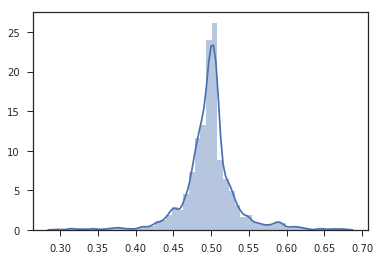

In [140]:
sns.distplot(predictions)


In [144]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner
hyperparameter_ranges = {'eta': ContinuousParameter(0, 1),
                        'min_child_weight': ContinuousParameter(1, 10),
                        'alpha': ContinuousParameter(0, 2),
                        'max_depth': IntegerParameter(1, 10),
                        'lambda': ContinuousParameter(0, 2)
                        }

objective_metric_name = 'validation:auc'
objective_type = 'Maximize'

In [145]:
tuner = HyperparameterTuner(estimator = xgb,
                            objective_metric_name = objective_metric_name,
                            objective_type = objective_type,
                            hyperparameter_ranges= hyperparameter_ranges,
                            max_jobs=20,
                            max_parallel_jobs=5)

In [146]:
tuner.fit({'train': s3_input_train, 'validation': s3_input_validation}, include_cls_metadata=False)

INFO:sagemaker:Creating hyperparameter tuning job with name: xgboost-190221-0106


In [147]:
region = boto3.Session().region_name
sage_client = boto3.Session().client('sagemaker')

tuning_job_name = tuner.latest_tuning_job.job_name

print(tuning_job_name)


xgboost-190221-0106


In [158]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = sage_client.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)

status = tuning_job_result['HyperParameterTuningJobStatus']
if status != 'Completed':
    print('Reminder: the tuning job has not been completed.')
    
job_count = tuning_job_result['TrainingJobStatusCounters']['Completed']
print("%d training jobs have completed" % job_count)
    
is_minimize = (tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['Type'] != 'Maximize')
objective_name = tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['MetricName']

20 training jobs have completed


In [159]:
from pprint import pprint
if tuning_job_result.get('BestTrainingJob',None):
    print("Best model found so far:")
    pprint(tuning_job_result['BestTrainingJob'])
else:
    print("No training jobs have reported results yet.")

    

Best model found so far:
{u'CreationTime': datetime.datetime(2019, 2, 21, 1, 16, 52, tzinfo=tzlocal()),
 u'FinalHyperParameterTuningJobObjectiveMetric': {u'MetricName': u'validation:auc',
                                                  u'Value': 0.4879859983921051},
 u'ObjectiveStatus': u'Succeeded',
 u'TrainingEndTime': datetime.datetime(2019, 2, 21, 1, 19, 57, tzinfo=tzlocal()),
 u'TrainingJobArn': u'arn:aws:sagemaker:us-east-1:068232277654:training-job/xgboost-190221-0106-016-a1290813',
 u'TrainingJobName': u'xgboost-190221-0106-016-a1290813',
 u'TrainingJobStatus': u'Completed',
 u'TrainingStartTime': datetime.datetime(2019, 2, 21, 1, 19, 18, tzinfo=tzlocal()),
 u'TunedHyperParameters': {u'alpha': u'0.5904035965937848',
                           u'eta': u'0.00014163814035207146',
                           u'lambda': u'1.355390473384122',
                           u'max_depth': u'1',
                           u'min_child_weight': u'1.5007938778571668'}}


In [160]:

tuneranalytics = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)

full_df = tuneranalytics.dataframe()
if len(full_df) > 0:
    df_hpo = full_df[full_df['FinalObjectiveValue'] > -float('inf')]
    if len(df_hpo) > 0:
        df_hpo = df_hpo.sort_values('FinalObjectiveValue', ascending=is_minimize)
        print("Number of training jobs with valid objective: %d" % len(df_hpo))
        print({"lowest":min(df_hpo['FinalObjectiveValue']),"highest": max(df_hpo['FinalObjectiveValue'])})
        pd.set_option('display.max_colwidth', -1)  # Don't truncate TrainingJobName        
    else:
        print("No training jobs have reported valid results yet.")
        
df_hpo


Number of training jobs with valid objective: 20
{'lowest': 0.2878110110759735, 'highest': 0.4879859983921051}


,FinalObjectiveValue,TrainingElapsedTimeSeconds,TrainingEndTime,TrainingJobName,TrainingJobStatus,TrainingStartTime,alpha,eta,lambda,max_depth,min_child_weight
4,0.487986,39.0,2019-02-21 01:19:57+00:00,xgboost-190221-0106-016-a1290813,Completed,2019-02-21 01:19:18+00:00,0.590404,0.000142,1.355390,1.0,1.500794
7,0.482447,32.0,2019-02-21 01:16:36+00:00,xgboost-190221-0106-013-bc44594d,Completed,2019-02-21 01:16:04+00:00,0.689852,0.084431,0.904380,1.0,3.781006
13,0.482296,41.0,2019-02-21 01:13:27+00:00,xgboost-190221-0106-007-f51441c8,Completed,2019-02-21 01:12:46+00:00,0.971385,0.078206,1.391889,1.0,5.258843
9,0.482296,48.0,2019-02-21 01:16:24+00:00,xgboost-190221-0106-011-06f156e6,Completed,2019-02-21 01:15:36+00:00,0.971385,0.078206,1.351889,1.0,5.258843
0,0.482079,35.0,2019-02-21 01:21:04+00:00,xgboost-190221-0106-020-683d0992,Completed,2019-02-21 01:20:29+00:00,0.815482,0.005259,0.669375,1.0,3.564114
6,0.481863,26.0,2019-02-21 01:16:56+00:00,xgboost-190221-0106-014-c0305aa5,Completed,2019-02-21 01:16:30+00:00,0.241771,0.113911,0.406211,1.0,1.720696
1,0.480680,36.0,2019-02-21 01:19:59+00:00,xgboost-190221-0106-019-cec165a4,Completed,2019-02-21 01:19:23+00:00,0.331492,0.116658,0.320395,1.0,8.430420
10,0.480135,41.0,2019-02-21 01:13:50+00:00,xgboost-190221-0106-010-08ca7a9d,Completed,2019-02-21 01:13:09+00:00,1.011384,0.098205,1.391888,1.0,5.258847
3,0.479377,40.0,2019-02-21 01:20:03+00:00,xgboost-190221-0106-017-e4bc53b3,Completed,2019-02-21 01:19:23+00:00,0.218783,0.021382,1.403730,1.0,2.166565
2,0.479374,47.0,2019-02-21 01:19:51+00:00,xgboost-190221-0106-018-ae75b25d,Completed,2019-02-21 01:19:04+00:00,0.165804,0.015645,2.000000,1.0,9.798768


In [161]:
import bokeh
import bokeh.io
bokeh.io.output_notebook()
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

class HoverHelper():

    def __init__(self, tuning_analytics):
        self.tuneranalytics = tuning_analytics

    def hovertool(self):
        tooltips = [
            ("FinalObjectiveValue", "@FinalObjectiveValue"),
            ("TrainingJobName", "@TrainingJobName"),
        ]
        for k in self.tuneranalytics.tuning_ranges.keys():
            tooltips.append( (k, "@{%s}" % k) )

        ht = HoverTool(tooltips=tooltips)
        return ht

    def tools(self, standard_tools='pan,crosshair,wheel_zoom,zoom_in,zoom_out,undo,reset'):
        return [self.hovertool(), standard_tools]

hover = HoverHelper(tuneranalytics)

p = figure(plot_width=900, plot_height=400, tools=hover.tools(), x_axis_type='datetime')
p.circle(source=df_hpo, x='TrainingStartTime', y='FinalObjectiveValue')
show(p)

Loading BokehJS ...

In [162]:
predictor_hpo = tuner.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: xgboost-2019-02-21-01-22-08-961


2019-02-21 01:19:57 Starting - Preparing the instances for training
2019-02-21 01:19:57 Downloading - Downloading input data
2019-02-21 01:19:57 Training - Training image download completed. Training in progress.
2019-02-21 01:19:57 Uploading - Uploading generated training model
2019-02-21 01:19:57 Completed - Training job completedArguments: train
[2019-02-21:01:19:45:INFO] Running standalone xgboost training.
[2019-02-21:01:19:45:INFO] Setting up HPO optimized metric to be : auc
[2019-02-21:01:19:45:INFO] File size need to be processed in the node: 0.5mb. Available memory size in the node: 8399.46mb
[2019-02-21:01:19:45:INFO] Determined delimiter of CSV input is ','
[01:19:45] S3DistributionType set as FullyReplicated
[01:19:45] 14021x9 matrix with 126189 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2019-02-21:01:19:45:INFO] Determined delimiter of CSV input is ','
[01:19:45] S3DistributionType set as FullyReplicated
[01:19:45] 4006x9 matrix wit

INFO:sagemaker:Creating endpoint with name xgboost-190221-0106-016-a1290813


--------------------------------------------------------------------------!

In [163]:
from sagemaker.predictor import csv_serializer
predictor_hpo.content_type = 'text/csv'
predictor_hpo.serializer = csv_serializer
predictor_hpo.deserializer = None

In [164]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, predictor_hpo.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.as_matrix()[:, 1:])
print (predictions)

[0.49998939 0.50001174 0.49998939 ... 0.49998939 0.49998939 0.49998939]


In [165]:
pd.crosstab(index=test_label, columns=np.round(predictions), rownames=['actual'], colnames=['predictions'])


predictions,0.0,1.0
actual,,
0,783,218
1,786,217


In [ ]:
#tuner.delete_endpoint()